In [158]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [86]:
df = pd.read_csv('datasets/spotify_songs.csv')

In [12]:
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.748,0.916,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,pop
1,0.726,NaN,-4.969,0.0373,0.072400,NaN,0.3570,0.6930,99.972,pop
2,0.675,0.931,-3.432,0.0742,0.079400,NaN,0.1100,0.6130,124.008,pop
3,0.718,0.930,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,NaN,pop
4,0.650,0.833,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,pop
...,...,...,...,...,...,...,...,...,...,...
32828,0.428,NaN,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,edm
32829,0.522,0.786,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,edm
32830,0.529,0.821,-4.899,0.0481,0.108000,NaN,0.1500,0.4360,127.989,edm
32831,0.626,NaN,NaN,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,edm


In [16]:
df['genre'].unique()

array(['pop', 'rap', 'rock', 'latin', 'r&b', 'edm'], dtype=object)

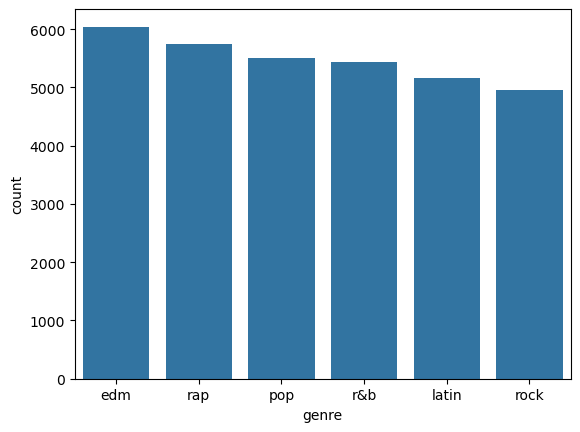

In [42]:
sns.countplot(x='genre', data=df, order=df['genre'].value_counts().index)
plt.show()

In [14]:
df.isnull().sum()

danceability         3662
energy              11261
loudness             7620
speechiness          2361
acousticness          894
instrumentalness     6470
liveness             2986
valence              7489
tempo                6557
genre                   0
dtype: int64

In [72]:
m_v_p = df.isnull().sum() / len(df)
m_v_p * 100

danceability        11.153413
energy              34.297810
loudness            23.208357
speechiness          7.190936
acousticness         2.722870
instrumentalness    19.705784
liveness             9.094509
valence             22.809369
tempo               19.970761
genre                0.000000
dtype: float64

In [88]:
imputed_columns_low_correlation = ['danceability', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

knn_impute = KNNImputer(n_neighbors=5)

df[imputed_columns_low_correlation] = knn_impute.fit_transform(df[imputed_columns_low_correlation])

In [90]:
#high correlation 

imputed_columns_high_correlation = ['energy', 'loudness']

iterative_imputer = IterativeImputer(max_iter=10, random_state=42)

df[imputed_columns_high_correlation] = iterative_imputer.fit_transform(df[imputed_columns_high_correlation])

In [62]:
df.isnull().sum()

danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [64]:
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.748,0.916000,-2.634000,0.05830,0.102000,0.000000,0.0653,0.5180,122.0360,pop
1,0.726,0.779485,-4.969000,0.03730,0.072400,0.007744,0.3570,0.6930,99.9720,pop
2,0.675,0.931000,-3.432000,0.07420,0.079400,0.000253,0.1100,0.6130,124.0080,pop
3,0.718,0.930000,-3.778000,0.10200,0.028700,0.000009,0.2040,0.2770,115.6102,pop
4,0.650,0.833000,-4.672000,0.03590,0.080300,0.000000,0.0833,0.7250,123.9760,pop
...,...,...,...,...,...,...,...,...,...,...
32828,0.428,0.927204,-1.814000,0.09360,0.076600,0.000000,0.0668,0.2100,128.1700,edm
32829,0.522,0.786000,-4.462000,0.04200,0.001710,0.004270,0.3750,0.4000,128.0410,edm
32830,0.529,0.821000,-4.899000,0.04810,0.108000,0.031222,0.1500,0.4360,127.9890,edm
32831,0.626,0.698260,-6.703819,0.10900,0.007920,0.127000,0.3430,0.3080,128.0080,edm


In [92]:
# 1 nacin - One-Hot 

# df = pd.get_dummies(df, columns=['genre'])

# 2 nacin  - Label Encoder

encoder = LabelEncoder()
df['genre'] = encoder.fit_transform(df['genre'])

In [94]:
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.748,0.916000,-2.634000,0.05830,0.102000,0.000000,0.0653,0.5180,122.0360,2
1,0.726,0.779485,-4.969000,0.03730,0.072400,0.007744,0.3570,0.6930,99.9720,2
2,0.675,0.931000,-3.432000,0.07420,0.079400,0.000253,0.1100,0.6130,124.0080,2
3,0.718,0.930000,-3.778000,0.10200,0.028700,0.000009,0.2040,0.2770,115.6102,2
4,0.650,0.833000,-4.672000,0.03590,0.080300,0.000000,0.0833,0.7250,123.9760,2
...,...,...,...,...,...,...,...,...,...,...
32828,0.428,0.927204,-1.814000,0.09360,0.076600,0.000000,0.0668,0.2100,128.1700,0
32829,0.522,0.786000,-4.462000,0.04200,0.001710,0.004270,0.3750,0.4000,128.0410,0
32830,0.529,0.821000,-4.899000,0.04810,0.108000,0.031222,0.1500,0.4360,127.9890,0
32831,0.626,0.698260,-6.703819,0.10900,0.007920,0.127000,0.3430,0.3080,128.0080,0


In [96]:
x = df.drop(columns='genre')
y = df['genre']

# x = df.drop(columns=['genre_edm', 'genre_latin','genre_pop','genre_r&b', 'genre_rap', 'genre_rock'])
# y = df['genre_edm', 'genre_latin','genre_pop','genre_r&b', 'genre_rap', 'genre_rock']

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

<Axes: >

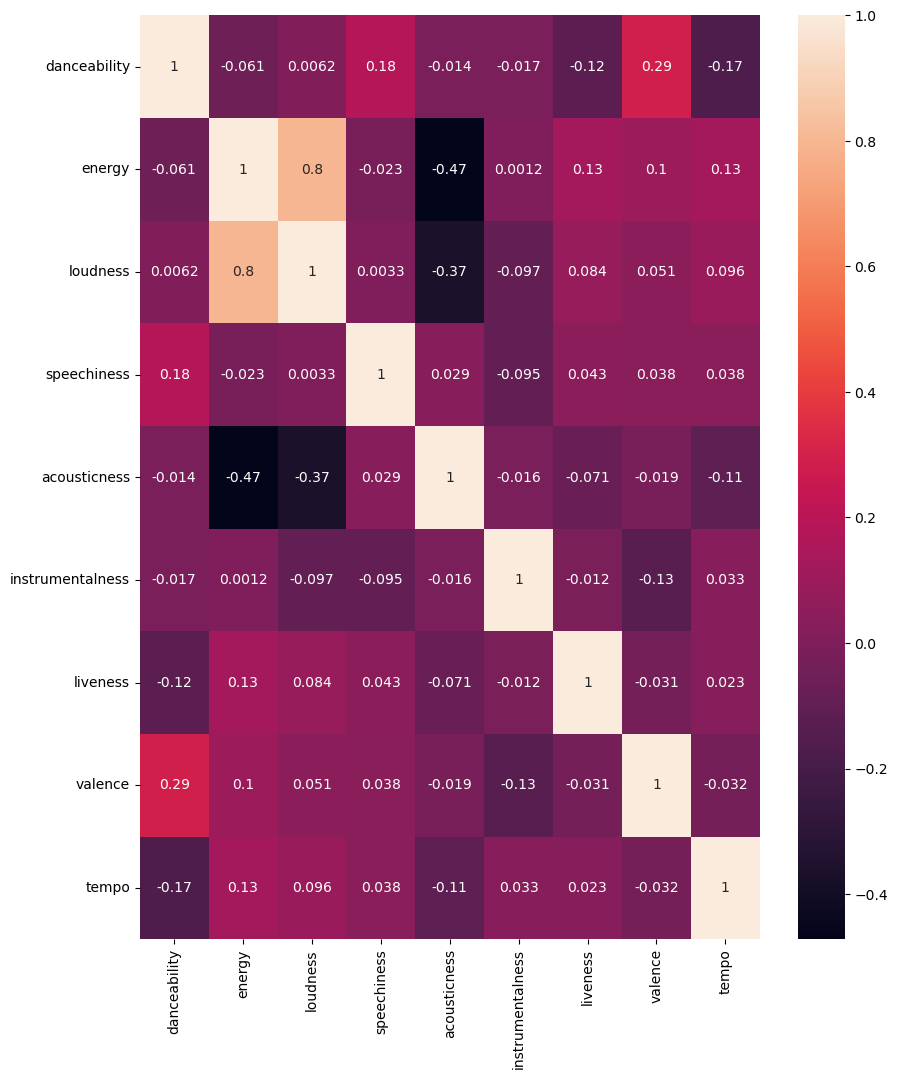

In [98]:
plt.figure(figsize=(10,12))
sns.heatmap(x.corr(), annot=True)

In [104]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [117]:
model = RandomForestClassifier()

model.fit(x_train, y_train)

RandomForestClassifier()

In [119]:
y_pred = model.predict(x_test)

In [121]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.63      0.61      1226
           1       0.41      0.34      0.37      1041
           2       0.31      0.28      0.29      1090
           3       0.39      0.35      0.37      1100
           4       0.51      0.58      0.54      1127
           5       0.58      0.67      0.62       983

    accuracy                           0.48      6567
   macro avg       0.46      0.47      0.47      6567
weighted avg       0.47      0.48      0.47      6567

0.475864169331506


## Bonus Task - GridSearchCV 

In [129]:
x_train2, x_test2,  y_train2, y_test2= train_test_split(x, y, test_size=0.1)

In [133]:
scaler = StandardScaler()

x_train2 = scaler.fit_transform(x_train2)
x_test2 = scaler.transform(x_test2)

In [139]:
param_grid = {
    'n_estimators' : [100,150,200],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train2, y_train2)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 5],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy')

In [141]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 150}
0.43639390313150467


In [143]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test2)

In [147]:
print(classification_report(y_test2, y_pred))
print(accuracy_score(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.60      0.56       614
           1       0.35      0.37      0.36       513
           2       0.31      0.14      0.19       540
           3       0.35      0.35      0.35       547
           4       0.47      0.58      0.52       544
           5       0.50      0.58      0.53       526

    accuracy                           0.44      3284
   macro avg       0.42      0.43      0.42      3284
weighted avg       0.42      0.44      0.42      3284

0.4381851400730816


# Pipeline of Models

In [162]:
pipeline_models = {
    'Random Forest': RandomForestClassifier(n_estimators=150, max_depth=5),
    'KNN': KNeighborsClassifier(n_neighbors=10),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', n_estimators=100, max_depth = 5)
}

for name, model in pipeline_models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, x_train2, y_train2, cv=5, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {cv_scores.mean():.4f}")

Random Forest: Mean Accuracy = 0.4358
KNN: Mean Accuracy = 0.4176
XGBoost: Mean Accuracy = 0.4864


In [174]:
for name, model in pipeline_models.items():

    model.fit(x_train2, y_train2)

    y_pred = model.predict(x_test2)

    print(f'\n{name} Evaluation')
    
    print(classification_report(y_test2, y_pred))
    print(accuracy_score(y_test2, y_pred))
    


Random Forest Evaluation
              precision    recall  f1-score   support

           0       0.53      0.59      0.56       614
           1       0.36      0.38      0.37       513
           2       0.32      0.14      0.20       540
           3       0.35      0.33      0.34       547
           4       0.47      0.57      0.51       544
           5       0.49      0.59      0.53       526

    accuracy                           0.44      3284
   macro avg       0.42      0.43      0.42      3284
weighted avg       0.42      0.44      0.42      3284

0.4366626065773447

KNN Evaluation
              precision    recall  f1-score   support

           0       0.48      0.64      0.55       614
           1       0.36      0.40      0.38       513
           2       0.28      0.24      0.26       540
           3       0.33      0.29      0.31       547
           4       0.53      0.49      0.51       544
           5       0.55      0.47      0.51       526

    accuracy    